In [105]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import solve

### Tutorial 3: Question 1(a)
We seek to solve the heat conduction problem
\begin{align}
u_t &= u_{xx},\quad -L<x<L,\quad t>0; \\
u(-L,t) &= u(L,t) =0, \\
u(x,0) &= 1,\quad \text{for}\,x>3;\,\text{zero otherwise}
\end{align}
using the explicit (forward) and the implicit (backward) finite difference methods. Further, we must set the interval half-length to be $L=10$ and determine the largest time step that each method allows.

#### Explicit Finite Difference Method
Defining all the parameters, space domain, and time domain.

In [106]:
h, k = 0.5, 0.0025
alpha = 1
xstart, xstop = [-10, 10]
tstart, tstop = [0, 40]

x = np.arange(xstart, xstop + h, h)
t = np.arange(tstart, tstop + k, k)
m, n = len(x), len(t)

Defining the boundary conditions.

In [107]:
boundary_conditions = [0, 0]
initial_conditions = [1 if i>3 else 0 for i in x]

u = np.zeros((m,n))

u[0,:] = boundary_conditions[0]
u[-1,:] = boundary_conditions[1]
u[:,0] = initial_conditions

Let $s\equiv \alpha^2 k/h^2$, then the Forward-Difference (Explicit) Method becomes
\begin{equation}
u_{i,j} = (1-2s)u_{i,j} + su_{i+1,j}+su_{i-1,j}
\end{equation}
for each $i=1,2,\ldots,m-1$ and $j=1,2,\ldots$.

In [108]:
s = alpha**2 * (k/h**2)

Using that $u_{0,0}=f(x_0),u_{1,0}=f(x_1),\ldots,u_{m,0}=f(x_m)$ and $u_{0,1}=u_{m,1}=0$, this difference can be expressed as $\vec{u}^{\,(j)} = A\vec{u}^{\,(j-1)}$ for each $j=1,2,\ldots$ where
\begin{equation}
A=
\begin{pmatrix}
(1-2s) & s & 0 &  & \cdots & 0 \\
s & (1-2s) & s & 0 & & \vdots \\
0 & s & (1-2s) & s & 0 & \vdots \\
\vdots & & & & & \vdots \\
0 & \cdots & & 0 & s & (1-2s)
\end{pmatrix}
\end{equation}

In [109]:
A = np.diag([1-2*s]*(m-2)) + np.diag([s]*(m-3), -1) + np.diag([s]*(m-3),1)

Then $\vec{u}^{\,(j)}$ is obtained from $\vec{u}^{\,(j-1)}$ by a simple matrix multiplication.

In [110]:
for j in range(1, n):
    b = u[1:-1,j-1].copy()
    u[1:-1, j] = np.matmul(A,b)

Plotting `x`, `t` and `u`.

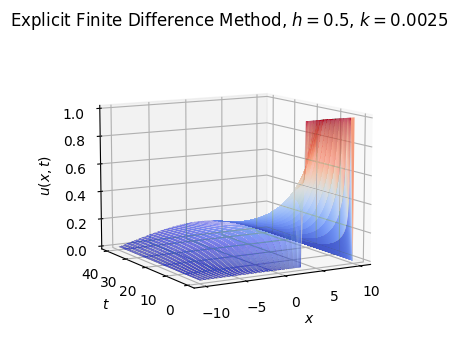

In [111]:
xv, tv = np.meshgrid(x, t)
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xv, tv, u.T, cmap=cm.coolwarm, rstride=1, cstride=1)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$t$')
ax.set_zlabel(r'$u(x,t)$', rotation=90)
ax.set_title(r'Explicit Finite Difference Method, $h={}$, $k={}$'.format(h, k))
ax.view_init(elev=10, azim=-120)
ax.zaxis.set_rotate_label(False)
plt.show()

The Forward-Difference method is conditionally stable with a rate of convergence $O(k+h^2)$, provided 
\begin{equation}
s\leq \frac{1}{2}
\end{equation}
and the required continuity conditions on the solution are met. For a given $h$, we can determine the largest time step $k$ the explicit method allows.

In [112]:
def stability_check(alpha, h, k):
    if alpha**2 * (k/h**2) <= (1/2):
        return True
    else:
        return False

k = np.linspace(0.0025, 0.15, 1000)
for i in range(len(k)):
    if stability_check(alpha, h, k[i]) is True:
        pass
    else:
        print('Divergence for k={:.5f}'.format(k[i]))
        break

Divergence for k=0.12505


#### Implicit Finite Difference Method
This method has the same parameters, space domain, time domain, boundary conditions, and initial conditions as the explicit method.

In [113]:
h, k = 0.5, 0.0025
alpha = 1
xstart, xstop = [-10, 10]
tstart, tstop = [0, 40]

x = np.arange(xstart, xstop + h, h)
t = np.arange(tstart, tstop + k, k)
m, n = len(x), len(t)

boundary_conditions = [0, 0]
initial_conditions = [1 if i>3 else 0 for i in x]

u = np.zeros((m,n))

u[0,:] = boundary_conditions[0]
u[-1,:] = boundary_conditions[1]
u[:,0] = initial_conditions

Again let $s\equiv\alpha^2 k/h^2$, then the Backward-Difference (Implicit) Method becomes
\begin{equation}
u_{i,j-1}=(1+2s)u_{i,j} - su_{i+1,j} - su_{i-1,j}
\end{equation}
for each $i=1,2,\ldots,m-1$ and $j=1,2,\ldots$. 

In [114]:
s = alpha**2 * (k/h**2)

Using that $u_{i,0}=f(x_i)$ for each $i=1,2,\ldots,m-1$ and $u_{m,j}=u_{0,j}=0$ for each $j=1,2,\ldots$, this difference can be expressed as $A\vec{u}^{\,(j)} = \vec{u}^{\,(j-1)}$ where
\begin{equation}
A = 
\begin{pmatrix}
(1+2s) & -s & 0 &  & \cdots & 0 \\
-s & (1+2s) & -s & 0 & & \vdots \\
0 & -s & (1+2s) & -s & 0 & \vdots \\
\vdots & & & & & \vdots \\
0 & \cdots & & 0 & -s & (1+2s)
\end{pmatrix}
\end{equation}

In [115]:
A = np.diag([1+2*s]*(m-2)) + np.diag([-s]*(m-3), -1) + np.diag([-s]*(m-3),1)

Then a linear system must be solved to obtain $\vec{u}^{\,(j)}$ from $\vec{u}^{\,(j-1)}$.

In [116]:
for j in range(1, n):
    b = u[1:-1,j-1].copy()
    b[0] = b[0] + s*u[0, j]
    b[-1] = b[-1] + s*u[-1, j]
    u[1:-1,j] = solve(A, b)

Plotting `x`, `t` and `u`.

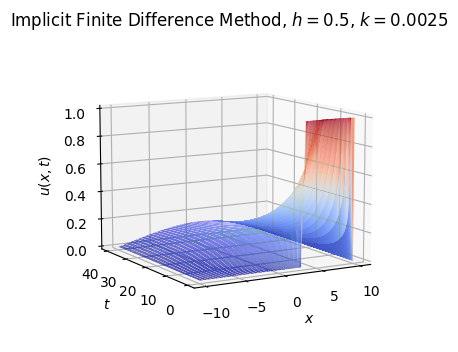

In [117]:
xv, tv = np.meshgrid(x, t)
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xv, tv, u.T, cmap=cm.coolwarm, rstride=1, cstride=1)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$t$')
ax.set_zlabel(r'$u(x,t)$', rotation=90)
ax.set_title(r'Implicit Finite Difference Method, $h={}$, $k={}$'.format(h, k))
ax.view_init(elev=10, azim=-120)
ax.zaxis.set_rotate_label(False)
plt.show()

For the Backward-Difference method, the eigenvalues of the matrix $A$ are
\begin{equation}
\mu_i = 1+ 4s\left[\sin\left(\frac{i\pi}{2m}\right)\right]^2
\end{equation}
for each $i=1,2,\ldots,m-1$ where $\mu_i$ is in $(t_{j-1},t_j)$.
Since $s>0$, then $\mu_i>1$ for all $i=1,2,\ldots,m-1$. Since the eigenvalues of $A^{-1}$ are the reciprocals of those of $A$, $p(A^{-1})<1$. This implies that $A^{-1}$ is convergent. So the method is stable independent of the choice of $s$. Since the Backward-Difference method is unconditionally stable with a local truncation error of order $O(k+h^2)$, then the choice of $k$ has no largest value. 